In [ ]:
# To your code repository
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/MyDrive/Colab_Notebooks/Hangman-transformers-cleaned"

/content/drive/MyDrive/Colab_Notebooks/Hangman-transformers-cleaned


In [1]:
!pip install datasets
# 
!pip install transformers[torch]

In [ ]:
!ls

 canine_best_model			  __pycache__
 canine_best_model.tar.gz		  Self-play-finetune.ipynb
 CanineHangmanPlayer.ipynb		  self-play-metrics-first_3_steps.npy
 CanineHangmanPlayer.py			  test_words.txt
 canine-pretrained-hangman-checkpoints	  Training-Hangman.ipynb
'canine-pretrained-hangman=checkpoints'   train_words.txt
 canine-pretrained-hangman-log		  val-accuracy.png
 hangman_data_generation.py		  validation_words.txt
 Hangman-transformers-demo.ipynb	  words_alpha.txt


In [2]:
from CanineHangmanPlayer import CanineHangmanPlayer
import numpy as np

tokenizer_config.json:   0%|          | 0.00/854 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/657 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/670 [00:00<?, ?B/s]

2025-05-17 03:26:56.172098: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-17 03:26:56.172200: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-17 03:26:56.255110: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-17 03:26:56.421572: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-17 03:26:57.946834: W tensorflow/compiler/tf2

In [2]:
with open('train_rf.txt', 'r') as f:
    train_words = f.read().splitlines()

with open('val_rf.txt', 'r') as f:
    val_words = f.read().splitlines()

## Self-play Finetuning

In [3]:
# Set-up a Hangman agent that we will train
selfplay_model = CanineHangmanPlayer('canine-pretrained-hangman-checkpoints/canine-pretrained-hangman-checkpoint-2')#"/content/drive/MyDrive/Colab_Notebooks/Hangman-transformers-cleaned/canine-pretrained-hangman-checkpoints/canine-pretrained-hangman-checkpoint-2")

In [4]:
selfplay_model.set_training(1e-6, 1e-5, training_mode="self-play")

100%|██████████| 8000/8000 [17:24<00:00,  7.66it/s]


Step: 1, train-loss: 2.773900706732273, val-loss: 2.7335850299596784, train-acc: 0.3256, val-acc: 0.36825


100%|██████████| 8000/8000 [17:37<00:00,  7.57it/s]


Step: 2, train-loss: 2.7553378350257876, val-loss: 2.7254132435172798, train-acc: 0.3472, val-acc: 0.37225


100%|██████████| 8000/8000 [17:34<00:00,  7.59it/s]


Step: 3, train-loss: 2.7461518265247347, val-loss: 2.712878114685416, train-acc: 0.3601, val-acc: 0.39125


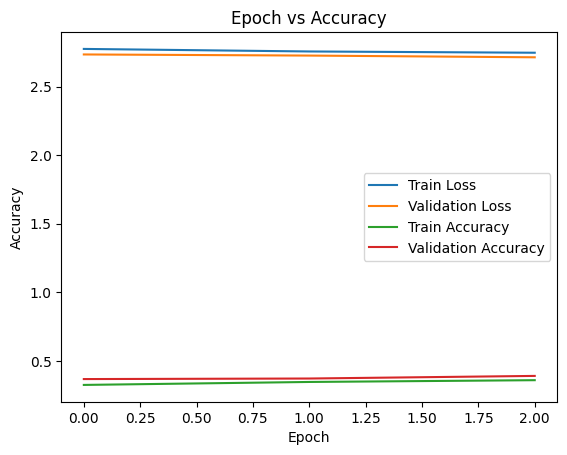

In [5]:
selfplay_model.self_play_finetune(train_words, val_words, 3)

In [6]:
checkpoint_dir = f"./canine"
selfplay_model.model.save_pretrained(checkpoint_dir)